In [34]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import utils
import dataloaders
import torchvision
import pathlib
from utils import read_im, save_im
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)

### Dataset

In [4]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

100.1%Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw
113.5%Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw
100.4%Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw
180.4%Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw
Processing...
Done!
The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


In [5]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [6]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [20]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [21]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [01:00<00:00, 15.51it/s]


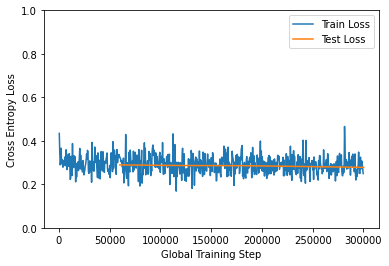

Final Test loss: 0.27792675940284306. Final Test accuracy: 0.9213


In [22]:
# We can now plot the training loss with our utility script

# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(test_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

## Plotting example

In [10]:
# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_model()

learning_rate = .0192
num_epochs = 6

# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_6epochs, test_loss_dict_6epochs = trainer.train(num_epochs)
num_epochs = 5

Training epoch 5: 100%|██████████| 938/938 [00:13<00:00, 71.97it/s]


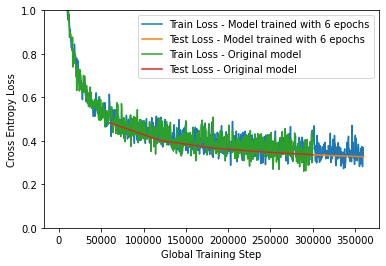

Final Test loss: 0.32675992415114574. Final Test accuracy: 0.9109


In [11]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_dict_6epochs, label="Train Loss - Model trained with 6 epochs")
utils.plot_loss(test_loss_dict_6epochs, label="Test Loss - Model trained with 6 epochs")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task A

In [23]:
""" Single-layer neural network with batch size of 64, 
    compared to an equal neural network with a 
    normalization in the range of [-1, 1].
"""
torch.random.manual_seed(0)
np.random.seed(0)

# Normalization added to transform using torchvision.
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_model()


# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_normalized, test_loss_dict_normalized = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:21<00:00, 43.01it/s]


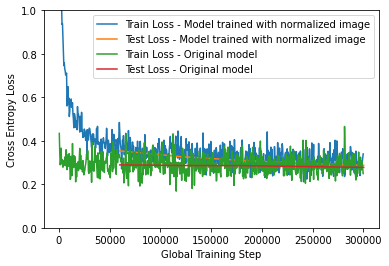

Final Test loss: 0.28729086951797556. Final Test accuracy: 0.9193


In [24]:
# Plot loss
utils.plot_loss(train_loss_dict_normalized, label="Train Loss - Model trained with normalized image")
utils.plot_loss(test_loss_dict_normalized, label="Test Loss - Model trained with normalized image")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task B

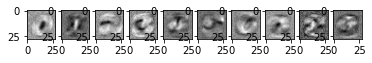

In [37]:
""" Visualization of the learned weight in the neural network,
    plotted as 10 28x28 images based on weight indices.
"""

output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

weight = list(model.children())[1].weight.cpu().data
counter = 0

for tensor in weight:
    tensor_data = tensor.reshape(28, 28)

    save_im(output_dir.joinpath("tensor_" + str(counter) + ".jpg"), tensor_data, cmap="gray")
    plt.subplot(1, 10, counter+1)
    plt.imshow(tensor_data, cmap="gray")

    counter += 1

plt.show()

### Task C

In [38]:
""" Trained neural network with learning rate increased to 1.0.
"""

learning_rate = 1.0

torch.random.manual_seed(0)
np.random.seed(0)

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_model()


# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_hlr, test_loss_dict_hlr = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:25<00:00, 37.30it/s]


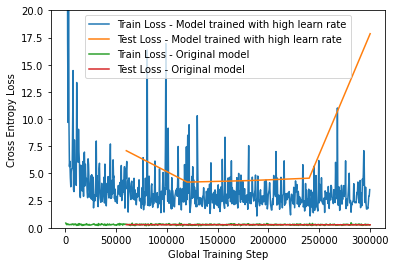

Final Test loss: 17.85256801289358. Final Test accuracy: 0.5688


In [41]:
# Plot loss
utils.plot_loss(train_loss_dict_hlr, label="Train Loss - Model trained with high learn rate")
utils.plot_loss(test_loss_dict_hlr, label="Test Loss - Model trained with high learn rate")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 20])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task D

In [42]:
def create_hidden_layer_model():

    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size,   C*height*width)
        nn.ReLU(64), # Applying ReLU as activation function
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )

    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model

In [45]:
""" Neural nework with an added hidden layer, using
    torchvisions nn.ReLU function.
"""

torch.random.manual_seed(0)
np.random.seed(0)

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_hidden_layer_model()


# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_hidden, test_loss_dict_hidden = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:21<00:00, 44.42it/s]


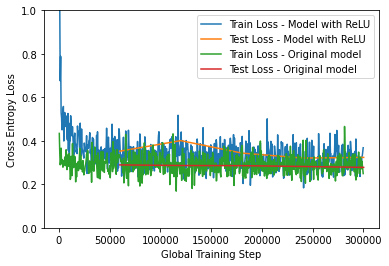

Final Test loss: 0.3238508340600095. Final Test accuracy: 0.9129


In [46]:
# Plot loss
utils.plot_loss(train_loss_dict_hidden, label="Train Loss - Model with ReLU")
utils.plot_loss(test_loss_dict_hidden, label="Test Loss - Model with ReLU")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")